# <center> Climate Change Exploratory Analysis </center>
### Import Preliminaries

In [1]:
%matplotlib inline

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from pylab import rcParams

# Set plotting format
#plt.rcParams['figure.figsize'] = (30,20)
%config InlineBackend.figure_format = 'retina'

# Disable notebook warnings
warnings.filterwarnings('ignore')


# Setting Dataframe format
pd.set_option('display.max_columns',1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('precision',2)

### Import Data

In [2]:
glob = pd.DataFrame(pd.read_csv('Data/GlobalTemperatures.csv', parse_dates=['dt']))
country = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt']))
state = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByState.csv', parse_dates=['dt']))
m_city = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByMajorCity.csv', parse_dates=['dt']))
city = pd.DataFrame(pd.read_csv('Data/GlobalLandTemperaturesByCity.csv', parse_dates=['dt']))

dfs = [glob, country, state, m_city, city]

for df in dfs:
    df.set_index(['dt'], drop=True, inplace=True)
    df.index.name = 'Datetime'

In [3]:
print('Global Data'), glob.info(), print(),  print('Country Data'), country.info(), 
print(), print('State Data') , state.info(), print(), print('Major City Data'), 
m_city.info(), print(), print('City Data'),  city.info()

Global Data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8)
memory usage: 224.4 KB

Country Data
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                         

(None, None, None, None)

In [4]:
glob_entities = [country, state, m_city, city]

for df in glob_entities:
    df['AverageTemperatureUpperBound'] = df['AverageTemperature'] + df['AverageTemperatureUncertainty']
    df['AverageTemperatureLowerBound'] = df['AverageTemperature'] - df['AverageTemperatureUncertainty']
    df.drop('AverageTemperatureUncertainty', axis=1, inplace=True)

## <Center>Global Temperatures by City</center>
### Cleaning the Data

In [5]:
# Reducing the size of the dataframe
#city = city.sample(30000)

In [6]:
# View the dataframe 
city.head()

,Unnamed: 0,AverageTemperature,City,Country,Latitude,Longitude,AverageTemperatureUpperBound,AverageTemperatureLowerBound
Datetime,,,,,,,,
1743-11-01,0,6.068,Århus,Denmark,57.05N,10.33E,7.805,4.331
1743-12-01,1,nan,Århus,Denmark,57.05N,10.33E,nan,nan
1744-01-01,2,nan,Århus,Denmark,57.05N,10.33E,nan,nan
1744-02-01,3,nan,Århus,Denmark,57.05N,10.33E,nan,nan
1744-03-01,4,nan,Århus,Denmark,57.05N,10.33E,nan,nan


In [7]:
# Checking null values
city.isnull().sum()

Unnamed: 0                           0
AverageTemperature              364130
City                                 0
Country                              0
Latitude                             0
Longitude                            0
AverageTemperatureUpperBound    364130
AverageTemperatureLowerBound    364130
dtype: int64

### Number of Countries and Cities Participating

In [8]:
print('Number of Countries Included in Data: ',city['Country'].nunique())
print('Number of Cities Included in Data:', city['City'].nunique())

Number of Countries Included in Data:  159
Number of Cities Included in Data: 3448


### Measurements Taken Per City

In [9]:
# Number of Temperature Measurement Taken at each city
c_city = pd.DataFrame(city.groupby(['Country','City'])['City'].count()).sample(5)
c_city.columns = ['Number of Cities']
c_city

,,Number of Cities
Country,City,
Egypt,Talkha,2659
United States,Vallejo,1977
Poland,Rzeszow,3239
Indonesia,Purwodadi,2265
France,Orléans,3239


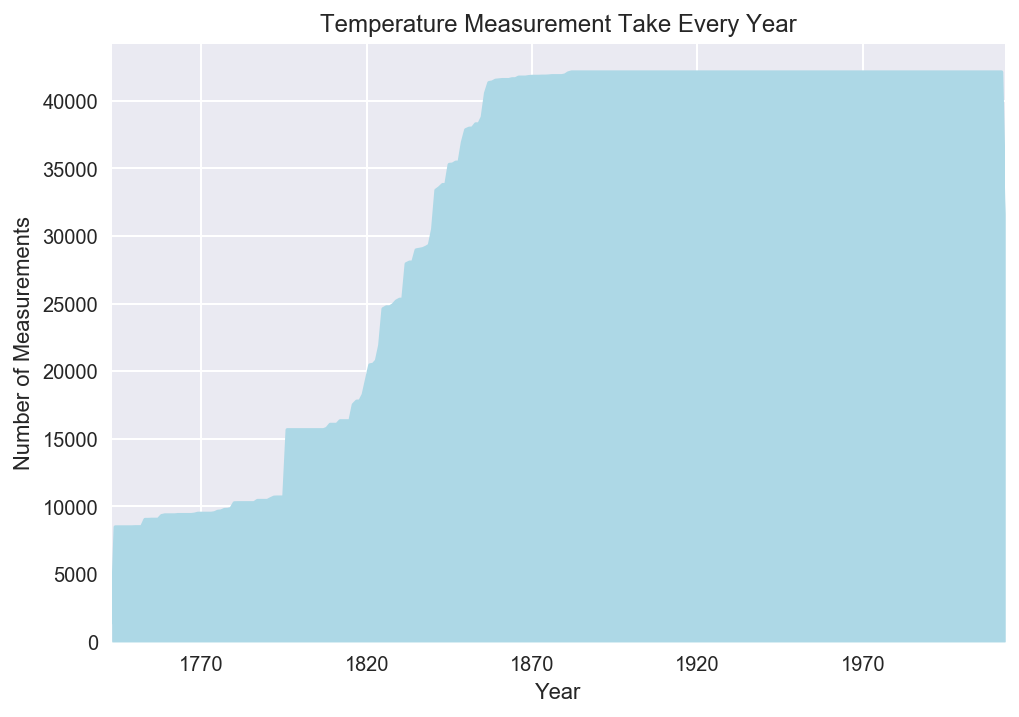

In [10]:
meas_freq = pd.DataFrame(city[['Country','City']])
meas_freq.index.to_datetime()
meas_freq['Measurments'] = 1

meas_freq.resample('A')['Measurments'].sum().plot.area(color='lightblue')
plt.title('Temperature Measurement Take Every Year')
plt.xlabel('Year'); plt.ylabel('Number of Measurements')

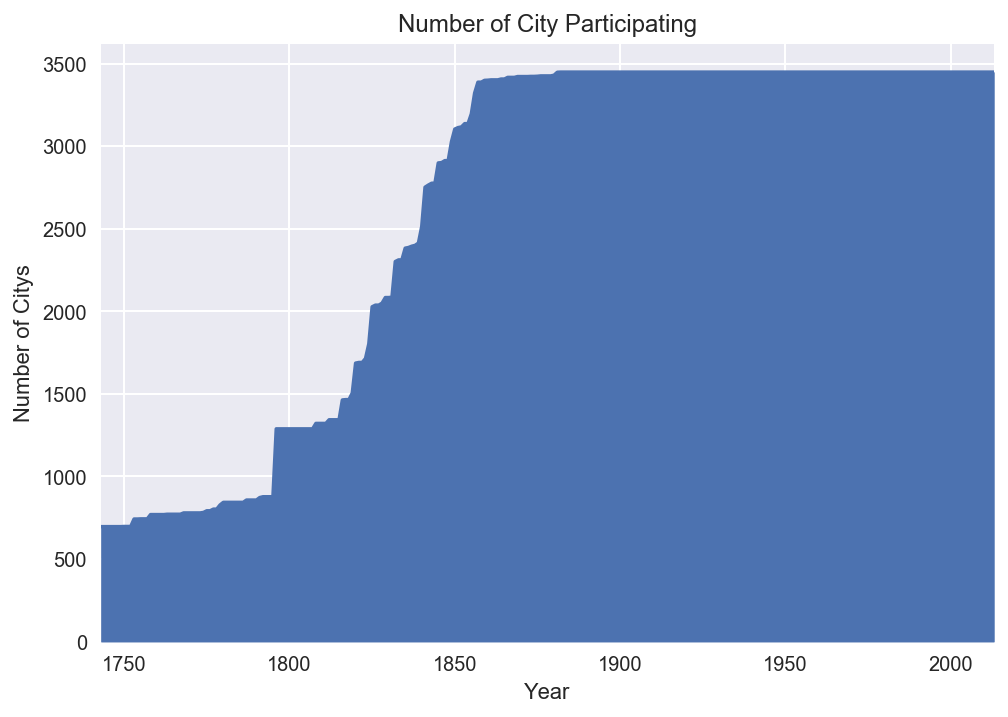

In [43]:
meas_freq['Year'] = meas_freq.index.year
meas_freq.groupby(['Year'])['City'].nunique().plot.area() #nunique() is Returns number of unique elements in the object.
plt.title('Number of City Participating')
plt.xlabel('Year'); plt.ylabel('Number of Citys')

### Overall Temperature Change by Sample City

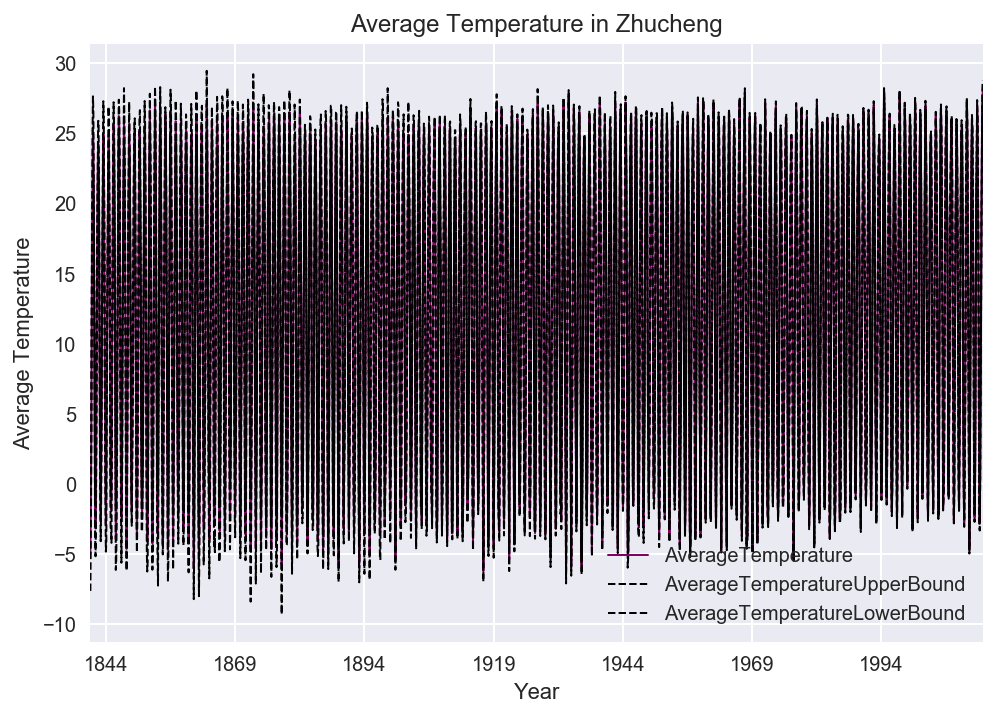

In [21]:
# Selecting a city
sample_city = city['City'].sample(1)[0]
sample_city

temp_sample_city = city[city['City'] == sample_city][['AverageTemperature','AverageTemperatureUpperBound','AverageTemperatureLowerBound']]
temp_sample_city.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average Temperature in ' + str(sample_city) )
plt.ylabel('Average Temperature'); plt.xlabel('Year')

### Vancouver's Overall Temperature Change

In [ ]:
# Selecting a city
sample_city = 'Vancouver'
temp_sample_city = city[city['City'] == sample_city][['AverageTemperature',
                                                      'AverageTemperatureUpperBound',
                                                      'AverageTemperatureLowerBound']]
temp_sample_city.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average Temperature in ' + str(sample_city) )
plt.ylabel('Average Temperature'); plt.xlabel('Year')

### Average Change in Temperature Across All Cities

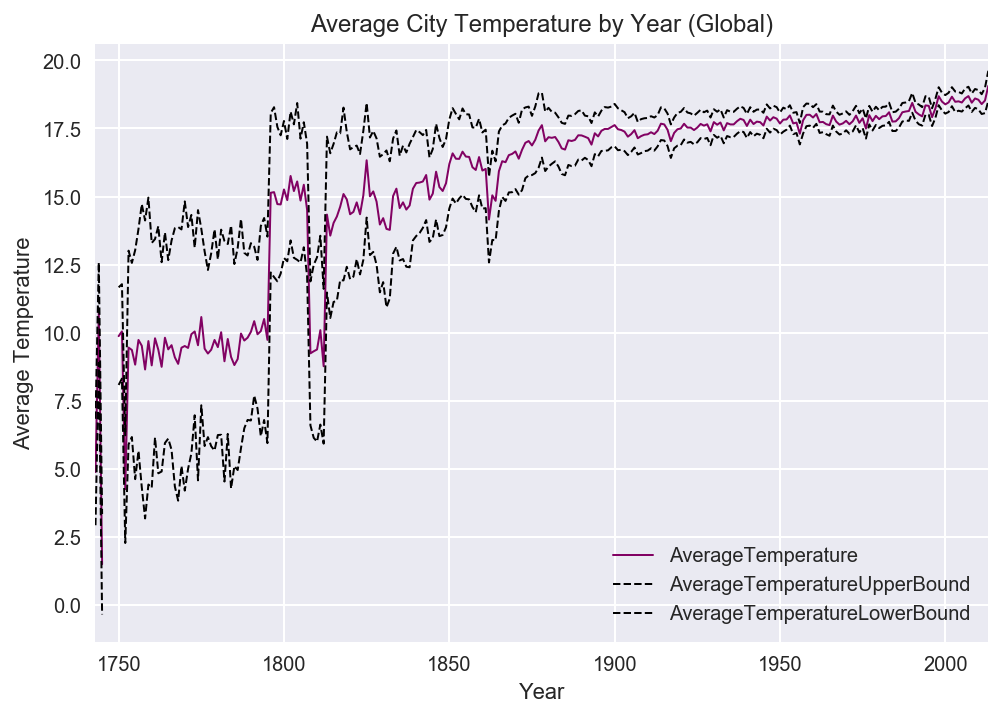

In [16]:
temp_growth = city
temp_growth['Year'] = temp_growth.index.year
temp_growth = city.groupby('Year')[['AverageTemperature','AverageTemperatureUpperBound','AverageTemperatureLowerBound']].mean()
temp_growth.plot.line(color=['#820263','#000000','#000000'], 
                           linewidth=1, style=['-', '--', '--'])
plt.title('Average City Temperature by Year (Global)')
plt.ylabel('Average Temperature'); plt.xlabel('Year')


# <center> Global Temperatures by Major City </center>
### Cleaning Data

In [22]:
m_city.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 7 columns):
AverageTemperature              228175 non-null float64
City                            239177 non-null object
Country                         239177 non-null object
Latitude                        239177 non-null object
Longitude                       239177 non-null object
AverageTemperatureUpperBound    228175 non-null float64
AverageTemperatureLowerBound    228175 non-null float64
dtypes: float64(3), object(4)
memory usage: 14.6+ MB


In [23]:
# View the dataframe 
m_city.head()

,AverageTemperature,City,Country,Latitude,Longitude,AverageTemperatureUpperBound,AverageTemperatureLowerBound
Datetime,,,,,,,
1849-01-01,26.704,Abidjan,Côte D'Ivoire,5.63N,3.23W,28.139,25.269
1849-02-01,27.434,Abidjan,Côte D'Ivoire,5.63N,3.23W,28.796,26.072
1849-03-01,28.101,Abidjan,Côte D'Ivoire,5.63N,3.23W,29.713,26.489
1849-04-01,26.140,Abidjan,Côte D'Ivoire,5.63N,3.23W,27.527,24.753
1849-05-01,25.427,Abidjan,Côte D'Ivoire,5.63N,3.23W,26.627,24.227


In [24]:
# Checking null values
m_city.isnull().sum()

AverageTemperature              11002
City                                0
Country                             0
Latitude                            0
Longitude                           0
AverageTemperatureUpperBound    11002
AverageTemperatureLowerBound    11002
dtype: int64

### Number of cities that are labelled as 'Major'

In [25]:
print('Number of Countries Included in Data: ',m_city['Country'].nunique())
print('Number of Cities Included in Data:', m_city['City'].nunique())

Number of Countries Included in Data:  49
Number of Cities Included in Data: 100


### Listing all Major Cities

In [27]:
m_city['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam', 'Delhi',
       'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh', 'Guangzhou',
       'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad', 'Ibadan',
       'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah', 'Jinan',
       'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa', 'Lagos',
       'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles', 'Luanda',
       'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne', 'Mexico',
       'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur', 'Nairobi',
       'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking', 'Pune',
       'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

### Checking That all Major Cities were in the Cities Dataset
Lets keep our fingers crossed

In [35]:
m_city[~m_city['City'].isin(city['City'])].count()['City']

0

Seems like all this data it included in the Cities dataset. Therefore not more actions are needed on our end.

##  <center> Global Temperatures by State </center>
### Clearning the Data

In [37]:
state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645675 entries, 1855-05-01 to 2013-09-01
Data columns (total 5 columns):
AverageTemperature              620027 non-null float64
State                           645675 non-null object
Country                         645675 non-null object
AverageTemperatureUpperBound    620027 non-null float64
AverageTemperatureLowerBound    620027 non-null float64
dtypes: float64(3), object(2)
memory usage: 29.6+ MB


In [38]:
state.head()

,AverageTemperature,State,Country,AverageTemperatureUpperBound,AverageTemperatureLowerBound
Datetime,,,,,
1855-05-01,25.544,Acre,Brazil,26.715,24.373
1855-06-01,24.228,Acre,Brazil,25.331,23.125
1855-07-01,24.371,Acre,Brazil,25.415,23.327
1855-08-01,25.427,Acre,Brazil,26.500,24.354
1855-09-01,25.675,Acre,Brazil,26.689,24.661


In [39]:
# How many countries are included in this dataset
state['Country'].value_counts()

Russia           254972
United States    149745
India             86664
China             68506
Canada            35358
Brazil            34328
Australia         16102
Name: Country, dtype: int64

In [66]:
# Now let look back at only the last 50 year
print ('Start Year: ',state.index.year.max() - 50)
print ('End Year: ',state.index.year.max())

Start Year:  1963
End Year:  2013


In [70]:
state['Year'] = state.index.year

In [71]:
# Filter out Data Based on Country
state = state[state['Country'] == 'Canada']

In [72]:
state_beg = state[state['Year'] == 1963]
state_beg = state_beg.groupby(['Country','State'])[['AverageTemperature','AverageTemperatureUpperBound',
                                    'AverageTemperatureLowerBound']].mean()

state_end = state[state['Year'] == 2013]
state_end = state_end.groupby(['Country','State'])[['AverageTemperature','AverageTemperatureUpperBound',
                                    'AverageTemperatureLowerBound']].mean()

# Calculate difference from beginning to now, with participating states at that time
X1963_to_2013 = (state_end - state_beg).dropna(axis=0, how='any')
X1963_to_2013

AverageTemperature  \
Country State                                           
Canada  Alberta                                 2.913   
        British Columbia                        2.939   
        Manitoba                                2.557   
        New Brunswick                           3.138   
        Newfoundland And Labrador               2.838   
        Northwest Territories                   3.433   
        Nova Scotia                             2.533   
        Nunavut                                 1.873   
        Ontario                                 2.385   
        Prince Edward Island                    2.775   
        Saskatchewan                            2.392   
        Yukon                                   3.781   

                                   AverageTemperatureUpperBound  \
Country State                                                     
Canada  Alberta                                           3.255   
        British Columbia                                  3.257   
        Manitoba                                          2.709   
        New Brunswick                                     3.300   
        Newfoundland And Labrador                         3.152   
        Northwest Territories                             3.996   
        Nova Scotia                                       2.760   
        Nunavut                                           2.323   
        Ontario                                           2.683   
        Prince Edward Island                              3.000   
        Saskatchewan                                      2.667   
        Yukon                                             4.320   

                                   AverageTemperatureLowerBound  
Country State                                                    
Canada  Alberta                                           2.571  
        British Columbia                                  2.622  
        Manitoba                                          2.404  
        New Brunswick                                     2.976  
        Newfoundland And Labrador                         2.524  
        Northwest Territories                             2.870  
        Nova Scotia                                       2.306  
        Nunavut                                           1.423  
        Ontario                                           2.087  
        Prince Edward Island                              2.550  
        Saskatchewan                                      2.116  
        Yukon                                             3.242

# <center>Global Temperatures by country

In [74]:
country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 4 columns):
AverageTemperature              544811 non-null float64
Country                         577462 non-null object
AverageTemperatureUpperBound    544811 non-null float64
AverageTemperatureLowerBound    544811 non-null float64
dtypes: float64(3), object(1)
memory usage: 22.0+ MB


In [75]:
country.head()

,AverageTemperature,Country,AverageTemperatureUpperBound,AverageTemperatureLowerBound
Datetime,,,,
1743-11-01,4.384,Åland,6.678,2.090
1743-12-01,nan,Åland,nan,nan
1744-01-01,nan,Åland,nan,nan
1744-02-01,nan,Åland,nan,nan
1744-03-01,nan,Åland,nan,nan


### Cleaning Data

In [76]:
# Fixing the null values

### Temperature Change in the Last 50 Year

In [85]:
# Creating Year Feature for grouping
country['Year'] = country.index.year
country_year = country.groupby(['Country','Year'])[['AverageTemperature','AverageTemperatureUpperBound',
                                    'AverageTemperatureLowerBound']].mean().unstack()
country_year.sample(5)

AverageTemperature                                   \
Year                                   1743   1744  1745 1746 1747 1748 1749   
Country                                                                        
North America                           nan    nan   nan  nan  nan  nan  nan   
Central African Republic                nan    nan   nan  nan  nan  nan  nan   
Montenegro                            5.645 11.816 2.861  nan  nan  nan  nan   
Bahamas                                 nan    nan   nan  nan  nan  nan  nan   
Uzbekistan                              nan    nan   nan  nan  nan  nan  nan   

                                                                         \
Year                       1750   1751  1752   1753   1754  1755   1756   
Country                                                                   
North America               nan    nan   nan    nan    nan   nan    nan   
Central African Republic    nan    nan   nan    nan    nan   nan    nan   
Montenegro               10.801 11.313 5.471 10.156 10.108 9.890 10.616   
Bahamas                     nan    nan   nan    nan    nan   nan    nan   
Uzbekistan                  nan    nan   nan    nan    nan   nan    nan   

                                                                          \
Year                       1757   1758   1759   1760   1761   1762  1763   
Country                                                                    
North America               nan    nan    nan    nan    nan    nan   nan   
Central African Republic    nan    nan    nan    nan    nan    nan   nan   
Montenegro               10.307  9.097 10.141  9.853 10.495 10.278 9.654   
Bahamas                     nan 24.650 24.544 19.251    nan    nan   nan   
Uzbekistan                  nan    nan    nan    nan    nan    nan   nan   

                                                                          \
Year                       1764   1765   1766  1767   1768   1769   1770   
Country                                                                    
North America               nan    nan    nan   nan -0.767  3.840    nan   
Central African Republic    nan    nan    nan   nan    nan    nan    nan   
Montenegro               10.471 10.322 10.171 9.709  8.955  9.987  9.979   
Bahamas                     nan    nan    nan   nan 23.768 24.706 24.649   
Uzbekistan                  nan    nan    nan   nan    nan    nan    nan   

                                                                           \
Year                       1771   1772   1773   1774   1775   1776   1777   
Country                                                                     
North America               nan    nan    nan -5.093  2.970  1.449  1.791   
Central African Republic    nan    nan    nan    nan    nan    nan    nan   
Montenegro                9.889 11.345 10.329 10.441 10.826  9.776  9.821   
Bahamas                  25.213    nan 25.211    nan 26.298 26.111 25.562   
Uzbekistan                  nan    nan    nan    nan    nan    nan    nan   

                                                                               \
Year                       1778   1779   1780   1781  1782   1783  1784  1785   
Country                                                                         
North America            -1.179 -8.991    nan -0.100 0.756    nan   nan   nan   
Central African Republic    nan    nan    nan    nan   nan    nan   nan   nan   
Montenegro               10.825 10.866 10.409 10.683 9.774 10.357 9.881 9.320   
Bahamas                     nan    nan    nan    nan   nan    nan   nan   nan   
Uzbekistan                  nan    nan    nan    nan   nan    nan   nan   nan   

                                                                          \
Year                      1786   1787   1788   1789   1790   1791   1792   
Country                                                                    
North America              nan    nan    nan    nan    nan    nan    na

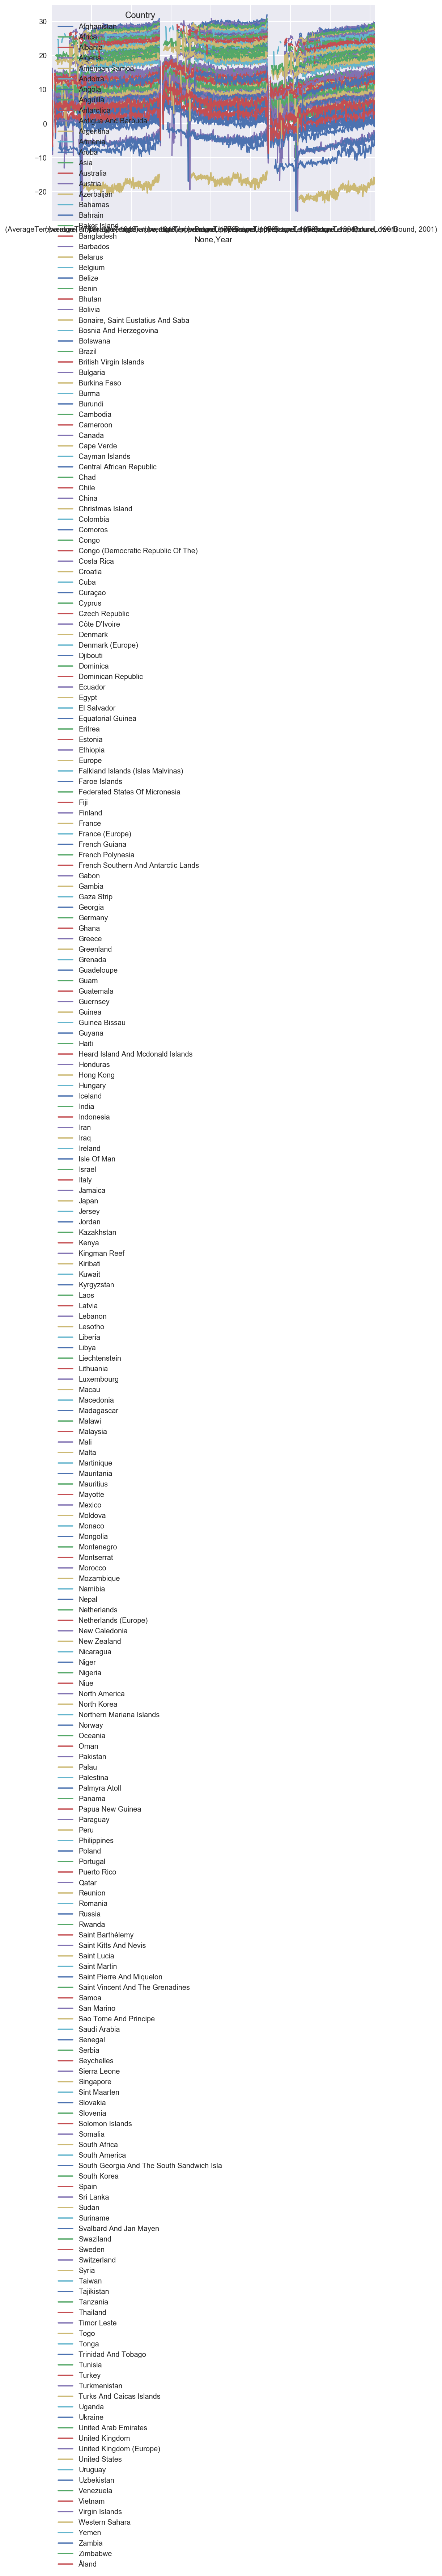

In [88]:
# Plotting These Changes
country_year.T.plot()